<a href="https://colab.research.google.com/github/fmakkawi/Data110/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Farah Makkawi

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Lincoln_1861.txt to Lincoln_1861 (1).txt


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Kennedy_1961.txt to Kennedy_1961.txt


In [4]:
from google.colab import files
uploaded = files.upload()


Saving Madison_1809.txt to Madison_1809.txt


In [8]:
with open('Lincoln_1861.txt', 'r') as f:
    lincoln_text = f.read()

with open('Kennedy_1961.txt', 'r') as f:
    kennedy_text = f.read()

with open('Madison_1809.txt', 'r') as f:
    madison_text = f.read()

# Store in dictionary for easy processing
addresses = {
    "Lincoln_1861.txt": lincoln_text,
    "Kennedy_1961.txt": kennedy_text,
    "Madison_1809.txt": madison_text
}



In [9]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Basic stop words list
stop_words = set([
    'the', 'is', 'in', 'and', 'of', 'to', 'a', 'as', 'for', 'on', 'at', 'by', 'with',
    'that', 'it', 'this', 'be', 'or', 'an', 'from', 'which', 'but', 'are', 'was', 'has',
    'have', 'had', 'were', 'been', 'not', 'we', 'they', 'you', 'he', 'she', 'i', 'our', 'their'
])

# Cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()
    return [word for word in words if word not in stop_words and word.isalpha()]

# Sentence splitting function
def sentence_tokenizer(text):
    return [s for s in re.split(r'[.!?]', text) if s.strip() != '']



Address: Lincoln_1861.txt
Word Count: 124
Average Sentence Length: 12.40
Top 7 Words: [('states', 4), ('do', 4), ('no', 4), ('those', 3), ('so', 3), ('united', 2), ('me', 2)]
Average Word Length: 6.26


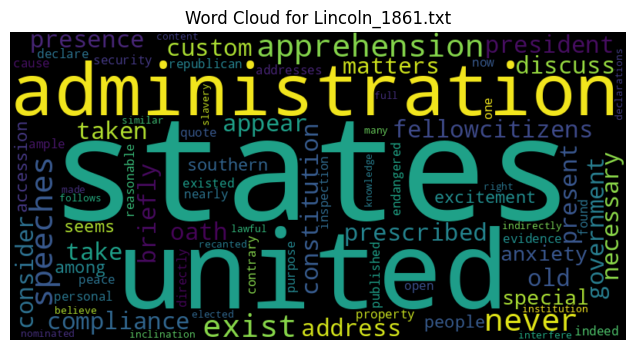


Address: Kennedy_1961.txt
Word Count: 97
Average Sentence Length: 13.86
Top 7 Words: [('any', 5), ('well', 3), ('god', 2), ('same', 2), ('forebears', 2), ('man', 2), ('all', 2)]
Average Word Length: 5.54


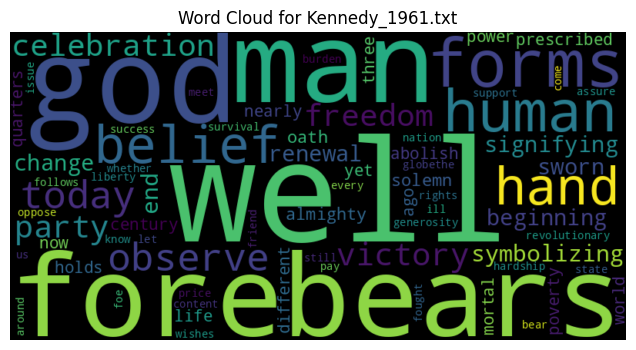


Address: Madison_1809.txt
Word Count: 56
Average Sentence Length: 18.67
Top 7 Words: [('most', 2), ('myself', 2), ('me', 2), ('my', 2), ('unwilling', 1), ('depart', 1), ('examples', 1)]
Average Word Length: 6.25


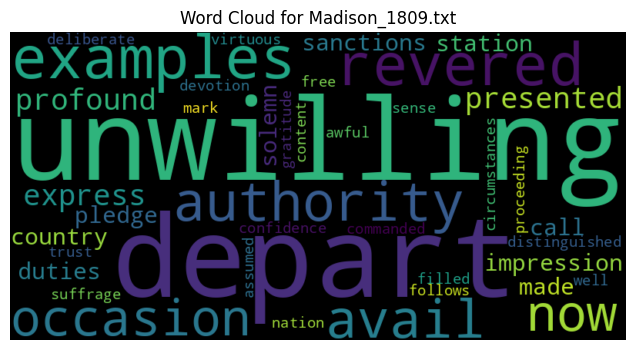

In [10]:
# Loop through each speech
for filename, content in addresses.items():
    words = clean_text(content)
    sentences = sentence_tokenizer(content)

    word_count = len(words)
    avg_sentence_length = sum(len(clean_text(s)) for s in sentences) / len(sentences)
    top_words = Counter(words).most_common(7)
    avg_word_length = sum(len(word) for word in words) / len(words)

    print(f"\nAddress: {filename}")
    print(f"Word Count: {word_count}")
    print(f"Average Sentence Length: {avg_sentence_length:.2f}")
    print(f"Top 7 Words: {top_words}")
    print(f"Average Word Length: {avg_word_length:.2f}")

    wc = WordCloud(width=800, height=400).generate(' '.join(words))
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {filename}')
    plt.show()
